In [1]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 86.3 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


Model page: https://huggingface.co/Salesforce/blip2-opt-2.7b

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Salesforce/blip2-opt-2.7b)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="Salesforce/blip2-opt-2.7b")

2025-05-27 05:54:45.471575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748325285.657782      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748325285.717786      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Device set to use cuda:0


In [7]:
# Load model directly
from transformers import AutoProcessor, AutoModelForVisualQuestionAnswering

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = AutoModelForVisualQuestionAnswering.from_pretrained("Salesforce/blip2-opt-2.7b")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
from PIL import Image
import os

# Folder where your images are uploaded
train_image_folder = "/kaggle/input/train-1"
test_image_folder = "/kaggle/input/test-1"

# List of image filenames
train_image_filenames = [
    "Bagels.jpg",
    "Coffee Cake.jpg",
    "Fish Tacos.jpg",
    "Hot Honey Baked Beans.jpg",
    "Kheer (Rice Pudding).jpg",
    "Marry Me Chickpeas.jpg",
    "burger.jpg",
    "paneer tikka masala.jpg",
    "pasta.jpg",
    "sandwich.jpg"
]

test_image_filenames = [
    "Cabbage Stir Fry.jpg",
    "Fried Noodles.jpg",
    "burrito.jpg",
    "chicken bites.jpg",
    "steamed buns.jpg"
]
# Load all images
train_images = [Image.open(os.path.join(train_image_folder, fname)).convert("RGB") for fname in train_image_filenames]
test_images = [Image.open(os.path.join(test_image_folder, fname)).convert("RGB") for fname in test_image_filenames]

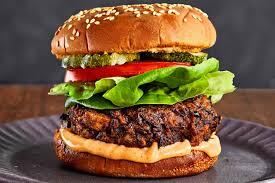

In [24]:
train_images[6]

In [34]:

# System prompt for recipe generation
SYSTEM_PROMPT = """You are an expert chef and recipe generator. Given an image of food and a title, 
you will generate a detailed recipe including ingredients and step-by-step instructions. 
Your recipes should be clear, precise, and easy to follow."""

FEW_SHOT_EXAMPLES = [
    {
        "input": {
            "image": train_images[6],  # actual PIL.Image object
            "title": "Mushroom Patty Thing"
        },
        "output": {
            "summary": {
                "Ingredients": [
                    "3 tbsp olive oil, divided",
                    "1 lb mushrooms (portobello, cremini, shiitake, or mix), trimmed and sliced",
                    "3/4 tsp kosher salt",
                    "1 tbsp soy sauce",
                    "2 tbsp tomato paste",
                    "2 cloves garlic, minced",
                    "15 oz can black beans, drained and rinsed",
                    "2 large eggs",
                    "1/2 cup panko",
                    "1/2 cup grated Parmesan cheese",
                    "1/3 cup mayonnaise",
                    "2 tsp sriracha",
                    "6 hamburger buns, toasted",
                    "Butter lettuce, for serving",
                    "Sliced tomato, for serving",
                    "Pickles, for serving"
                ],
                "Instructions": [
                    "Cook mushrooms in olive oil with salt, soy sauce, tomato paste, and garlic until soft and browned",
                    "Mash black beans and mix with eggs, panko, cheese, and cooked mushrooms to form a burger mixture",
                    "Shape into patties and cook in a skillet until browned on both sides",
                    "Mix mayonnaise and sriracha, then serve burgers on toasted buns with sriracha mayo and desired toppings"
                ]
            }
        }
    }
]


In [6]:
# !pip install -U langchain-community
# !pip install transformers torch nltk rouge-score

In [28]:
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain import HuggingFacePipeline

# Create memory for storing conversation history
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

# Create the prompt template with memory
prompt_template = PromptTemplate(
    input_variables=["image", "title", "chat_history"],
    template=f"{SYSTEM_PROMPT}\n\n{{chat_history}}\n\n{FEW_SHOT_EXAMPLES}\n\nInput Image: {{image}}\nTitle: {{title}}\nOutput:"
)

def create_pipeline(model, processor, model_type="llava"):
    """Create a pipeline for either LLaVA or BLIP2 model."""
    if model_type == "llava":
        def process_inputs(image, text):
            image_inputs = processor['image_processor'](images=image, return_tensors="pt")
            text_inputs = processor['tokenizer'](text, return_tensors="pt", padding=True)
            return {**image_inputs, **text_inputs}
    else:
        def process_inputs(image, text):
            return processor(images=image, text=text, return_tensors="pt")
    
    return HuggingFacePipeline(
        pipeline=model,
        model_kwargs={
            "temperature": 0.7,
            "max_length": 512,
            "process_inputs": process_inputs
        }
    )

# Create LangChain pipelines for both models
blip2_pipeline = create_pipeline(model, processor, "blip2")

blip2_chain = LLMChain(
    llm=blip2_pipeline,
    prompt=prompt_template,
    memory=memory,
    verbose=True
)

In [14]:
import json
from typing import Dict, List
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
def calculate_bleu_score(reference: str, candidate: str) -> float:
    """Calculate BLEU score between reference and candidate text."""
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())
    smoothing = SmoothingFunction().method1
    return sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoothing)

def calculate_rouge_scores(reference: str, candidate: str) -> Dict[str, float]:
    """Calculate ROUGE scores between reference and candidate text."""
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return {
        'rouge1': scores['rouge1'].fmeasure,
        'rouge2': scores['rouge2'].fmeasure,
        'rougeL': scores['rougeL'].fmeasure
    }

def generate_recipe(image: Image.Image, title: str) -> Dict:
    """Generate recipe using BLIP2 model with few-shot prompting."""
    try:
        # Create prompt with few-shot examples
        prompt = f"{FEW_SHOT_EXAMPLES}\n\nInput Image: [image]\nTitle: {title}\nOutput:"
        
        # Process inputs
        inputs = processor(images=image, text=prompt, return_tensors="pt")
        
        # Generate recipe
        outputs = model.generate(
            **inputs,
            max_length=512,
            num_beams=3,
            early_stopping=True
        )
        
        # Decode output
        generated_text = processor.decode(outputs[0], skip_special_tokens=True)
        
        return {
            "blip2_recipe": generated_text
        }
    except Exception as e:
        print(f"Error generating recipe: {e}")
        return {
            "blip2_recipe": None,
            "error": str(e)
        }

def evaluate_recipe_generation(test_data: List[Dict]) -> Dict[str, float]:
    """Evaluate recipe generation on test data using BLIP2 only."""
    total_bleu = 0
    total_rouge = {'rouge1': 0, 'rouge2': 0, 'rougeL': 0}
    
    for item in test_data:
        # Generate recipe using BLIP2
        generated_recipes = generate_recipe(
            image=item['input']['image'],  # Now passing the actual image object
            title=item['input']['title']
        )
        
        # Get reference and candidate texts
        reference = json.dumps(item['output']['summary'])
        candidate = generated_recipes['blip2_recipe']
        
        if candidate is None:
            continue
        
        # Calculate metrics
        bleu = calculate_bleu_score(reference, candidate)
        rouge = calculate_rouge_scores(reference, candidate)
        
        total_bleu += bleu
        for metric in total_rouge:
            total_rouge[metric] += rouge[metric]
    
    num_samples = len(test_data)
    return {
        'bleu': total_bleu / num_samples,
        'rouge1': total_rouge['rouge1'] / num_samples,
        'rouge2': total_rouge['rouge2'] / num_samples,
        'rougeL': total_rouge['rougeL'] / num_samples
    }

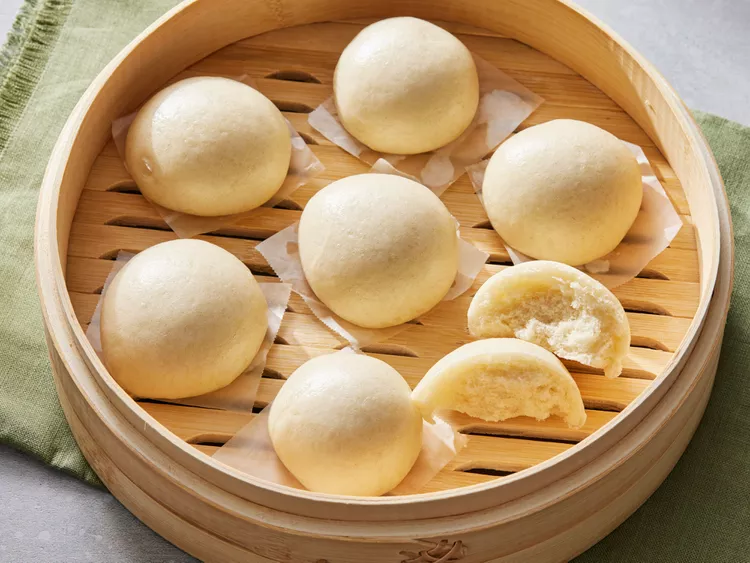

In [31]:
test_images[4]

In [32]:
# test_set = [
#     {
#         "input": {
#             "image": test_images[0],  # Cabbage Stir Fry.jpg
#             "title": "Fried Cabbage"
#         },
#         "output": {
#             "summary": {
#                 "Ingredients": [
#                     "1 tablespoon vegetable oil",
#                     "2 cloves garlic, minced",
#                     "1 pound shredded cabbage",
#                     "1 tablespoon soy sauce",
#                     "1 tablespoon Chinese cooking wine (Shaoxing wine)"
#                 ],
#                 "Instructions": [
#                     "Heat oil in a wok, add garlic, and cook for a few seconds until slightly browned",
#                     "Add shredded cabbage, stir to coat, cover, and cook for 1 minute",
#                     "Pour in soy sauce, stir for another minute, then add cooking wine and stir-fry until tender",
#                     "Serve hot and enjoy"
#                 ]
#             }
#         }
#     },
#     {
#         "input": {
#             "image": test_images[4],  # steamed buns.jpg
#             "title": "Fluffy Buns"
#         },
#         "output": {
#             "summary": {
#                 "Ingredients": [
#                     "1 ¾ cups all-purpose flour, divided",
#                     "¾ cup warm water, divided",
#                     "1 tablespoon active dry yeast",
#                     "1 teaspoon white sugar",
#                     "2 tablespoons white sugar",
#                     "1 tablespoon vegetable oil",
#                     "¼ teaspoon salt",
#                     "½ teaspoon baking powder"
#                 ],
#                 "Instructions": [
#                     "Mix 1/4 cup flour, 1/4 cup warm water, yeast, and 1 tsp sugar; let sit 30 mins",
#                     "Add remaining ingredients and knead to smooth dough; let rise until tripled",
#                     "Punch down, knead in baking powder, shape into 24 balls on wax paper squares",
#                     "Steam in batches for 15 mins; remove lid carefully to avoid water dripping on buns"
#                 ]
#             }
#         }
#     }
# ]


In [ ]:
# def main():
#     # Load test data
#     test_data = load_data('test.json')
    
#     # Evaluate the models
#     metrics = evaluate_recipe_generation(test_data)
    
#     # Print results
#     print("\nEvaluation Metrics:")
#     print(f"BLEU Score: {metrics['bleu']:.4f}")
#     print(f"ROUGE-1: {metrics['rouge1']:.4f}")
#     print(f"ROUGE-2: {metrics['rouge2']:.4f}")
#     print(f"ROUGE-L: {metrics['rougeL']:.4f}")

# if __name__ == "__main__":
#     main()


In [43]:

def main():
    # Test data
    test_data = [
        {
            "input": {
                "image": test_images[0],  # Cabbage Stir Fry.jpg
                "title": "Fried Cabbage"
            },
            "output": {
                "summary": {
                    "Ingredients": [
                        "1 tablespoon vegetable oil",
                        "2 cloves garlic, minced",
                        "1 pound shredded cabbage",
                        "1 tablespoon soy sauce",
                        "1 tablespoon Chinese cooking wine (Shaoxing wine)"
                    ],
                    "Instructions": [
                        "Heat oil in a wok, add garlic, and cook for a few seconds until slightly browned",
                        "Add shredded cabbage, stir to coat, cover, and cook for 1 minute",
                        "Pour in soy sauce, stir for another minute, then add cooking wine and stir-fry until tender",
                        "Serve hot and enjoy"
                    ]
                }
            }
        },
        {
            "input": {
                "image": test_images[4],  # steamed buns.jpg
                "title": "Fluffy Buns"
            },
            "output": {
                "summary": {
                    "Ingredients": [
                        "1 ¾ cups all-purpose flour, divided",
                        "¾ cup warm water, divided",
                        "1 tablespoon active dry yeast",
                        "1 teaspoon white sugar",
                        "2 tablespoons white sugar",
                        "1 tablespoon vegetable oil",
                        "¼ teaspoon salt",
                        "½ teaspoon baking powder"
                    ],
                    "Instructions": [
                        "Mix 1/4 cup flour, 1/4 cup warm water, yeast, and 1 tsp sugar; let sit 30 mins",
                        "Add remaining ingredients and knead to smooth dough; let rise until tripled",
                        "Punch down, knead in baking powder, shape into 24 balls on wax paper squares",
                        "Steam in batches for 15 mins; remove lid carefully to avoid water dripping on buns"
                    ]
                }
            }
        }
    ]
    
    # Evaluate the model
    metrics = evaluate_recipe_generation(test_data)
    
    # Print results
    print("\nEvaluation Metrics:")
    print(f"BLEU Score: {metrics['bleu']:.4f}")
    print(f"ROUGE-1: {metrics['rouge1']:.4f}")
    print(f"ROUGE-2: {metrics['rouge2']:.4f}")
    print(f"ROUGE-L: {metrics['rougeL']:.4f}")

if __name__ == "__main__":
    main()


Evaluation Metrics:
BLEU Score: 0.0129
ROUGE-1: 0.1789
ROUGE-2: 0.0290
ROUGE-L: 0.0993
